In [ ]:
from google.cloud import bigquery
import pandas as pd
from google.colab import auth
import re

In [ ]:
#@title Enter Google Cloud/BigQuery Project ID
project_id = 'de-hw1-447917' #@param{type:"string"}


# Create BigQuery client
bq_client = bigquery.Client(project = project_id)

In [ ]:
%%bigquery results --project {project_id}
    SELECT MIN(year.year) AS earliest_year, MAX(year.year) AS latest_year
FROM `bigquery-public-data.google_books_ngrams_2020.eng_fiction_1`,
UNNEST(years) AS year;

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
results

,earliest_year,latest_year
0,1562,2019


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


EFLLex


In [ ]:

file_path = "/content/drive/MyDrive/Data eng/EFLLex_NLP4J.tsv"


df = pd.read_csv(file_path, sep="\t")


df.head()


,word,tag,level_freq@a1,level_freq@a2,level_freq@b1,level_freq@b2,level_freq@c1,total_freq@total,nb_doc@a1,nb_doc@a2,...,The_Mill_On_The_Floss@a1,The_Mummy@a2,Swan_Lake@a2,The_Blue_Scarab@b1,The_Mill_On_The_Floss@total,Swan_Lake@total,The_Mummy@total,Touchstone@b2,New_Headway@a1,Exam_English@a2
0,'50s,NN,0.0,0.5559,1.6375,0.0,0.8152,1.2813,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,'60s,NN,0.0,1.1119,0.0000,0.0,0.8152,0.8740,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,'70s,NN,0.0,1.1119,0.0000,0.0,0.0000,0.1625,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,'80s,NN,0.0,1.1119,0.0000,0.0,0.0000,0.1625,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,'90s,NN,0.0,0.5559,0.0000,0.0,0.0000,0.0812,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
cefr_columns = ["level_freq@a1", "level_freq@a2", "level_freq@b1", "level_freq@b2", "level_freq@c1"]
cefr_labels = ["A1", "A2", "B1", "B2", "C1"]

def assign_cefr_label(row):
    for col, label in zip(cefr_columns, cefr_labels):
        if row[col] > 0:
            return label
    return None

df["CEFR_Label"] = df.apply(assign_cefr_label, axis=1)

df.head()


,word,tag,level_freq@a1,level_freq@a2,level_freq@b1,level_freq@b2,level_freq@c1,total_freq@total,nb_doc@a1,nb_doc@a2,nb_doc@b1,nb_doc@b2,nb_doc@c1,nb_doc@total,Exam_English@c1,Exam_English@total,The_Hound_of_the_Baskervilles@a1,The_Adventures_of_the_Blue_Carbuncle@a1,Silver_Blaze@a1,The_House_On_The_Hill@a1,English_Unlimited@a1,The_Signalman@a1,A_Pretty_Face@a1,Touchstone@a1,The_Black_Cat@a2,The_Curse_of_the_Black_Pearl@a2,New_English_File@a2,The_No__1_Ladies_Detective_Agency@a2,Logan_s_Choice@a2,Touchstone@a2,The_Piano@a2,New_Headway@a2,A_Shot_in_the_Night@a2,The_Island_of_Dr_Moreau@a2,English_Unlimited@a2,Mr_Bean_in_Town@a2,Home_for_Christmas@a2,Bleak_House@b1,Exam_English@b1,face2face@b1,Orpheus_Descending@b1,English_Unlimited@b1,Linguapress@b1,Touchstone@b1,Viewpoint@b2,Exam_English@b2,face2face@b2,Sparkling_Cyanide@b2,A_murder_is_announced@b2,Benetton@b2,The_War_of_the_Worlds@b2,English_Unlimited@b2,Death_on_the_Nile@b2,Linguapress@b2,Viewpoint@c1,Schindlers_List@c1,Brave_New_World@c1,Les_Miserables@c1,English_Unlimited@c1,Linguapress@c1,The_Adventures_of_the_Blue_Carbuncle@total,The_No__1_Ladies_Detective_Agency@total,face2face@total,The_Island_of_Dr_Moreau@total,The_House_On_The_Hill@total,Les_Miserables@total,The_Signalman@total,Orpheus_Descending@total,Viewpoint@total,Sparkling_Cyanide@total,The_Piano@total,The_Curse_of_the_Black_Pearl@total,The_Black_Cat@total,New_English_File@total,Schindlers_List@total,Brave_New_World@total,Silver_Blaze@total,Benetton@total,A_Shot_in_the_Night@total,The_War_of_the_Worlds@total,English_Unlimited@total,Logan_s_Choice@total,Mr_Bean_in_Town@total,A_Pretty_Face@total,Touchstone@total,The_Hound_of_the_Baskervilles@total,Bleak_House@total,A_murder_is_announced@total,New_Headway@total,Death_on_the_Nile@total,Linguapress@total,Home_for_Christmas@total,East_of_Eden@c1,East_of_Eden@total,New_English_File@a1,Dante_s_Peak@a2,The_Blue_Scarab@b2,Dante_s_Peak@total,The_Blue_Scarab@total,The_Last_Unicorn@a2,The_Last_Unicorn@total,Amazon_Rally@a1,Amazon_Rally@total,The_Mill_On_The_Floss@a1,The_Mummy@a2,Swan_Lake@a2,The_Blue_Scarab@b1,The_Mill_On_The_Floss@total,Swan_Lake@total,The_Mummy@total,Touchstone@b2,New_Headway@a1,Exam_English@a2,CEFR_Label
0,'50s,NN,0.0,0.5559,1.6375,0.0,0.8152,1.2813,0.0,1.0,1.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A2
1,'60s,NN,0.0,1.1119,0.0000,0.0,0.8152,0.8740,0.0,1.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A2
2,'70s,NN,0.0,1.1119,0.0000,0.0,0.0000,0.1625,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A2
3,'80s,NN,0.0,1.1119,0.0000,0.0,0.0000,0.1625,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [ ]:
efllex_cleaned = df[['word','tag','CEFR_Label']]

In [ ]:
efllex_cleaned.to_csv('/content/drive/MyDrive/Data eng/EFLLex_NLP4J.csv', index=False)

Visualization

In [ ]:
%%bigquery results --project {project_id}
    SELECT *
FROM `de-hw1-447917.final_proj_dataset.weighted_cefr_by_year`;

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
results


,year,avg_cefr_score
0,1591,1.000000
1,1596,1.000000
2,1607,1.000000
3,1612,1.000000
4,1617,1.000000
...,...,...
391,1587,2.102601
392,1613,2.108696
393,1671,2.117548
394,1626,2.123752


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/score_by_year.png'

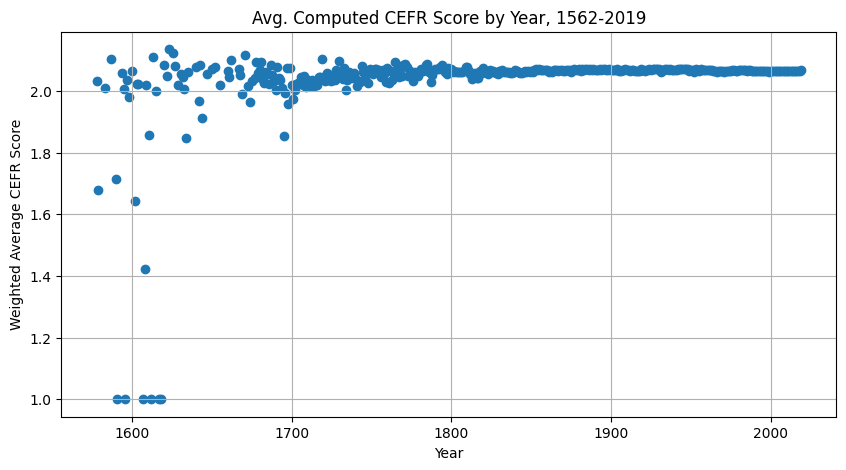

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(results['year'], results['avg_cefr_score'])
plt.xlabel("Year")
plt.ylabel("Weighted Average CEFR Score")
plt.title("Avg. Computed CEFR Score by Year, 1562-2019")
plt.grid(True)
plt.savefig("/content/drive/MyDrive/score_by_year.png")
plt.show()


In [ ]:
%%bigquery cefr_decade --project {project_id}
    SELECT *
FROM `de-hw1-447917.final_proj_dataset.cefr_decade`;

Query is running:   0%|          |

Downloading:   0%|          |

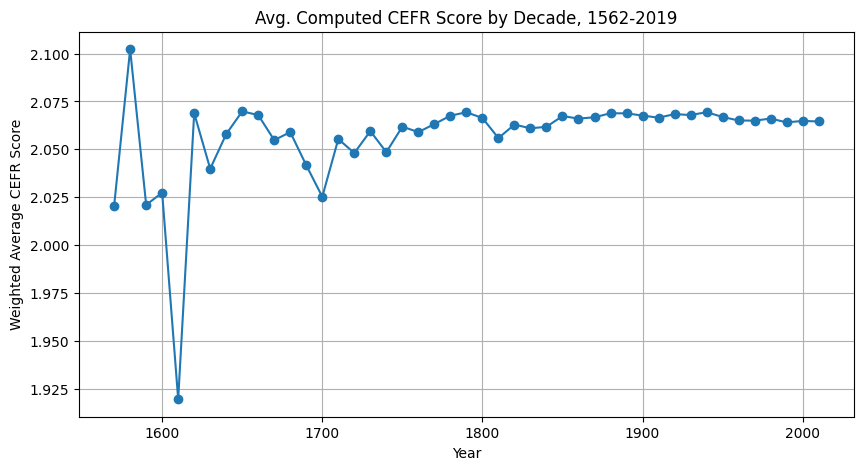

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(cefr_decade['decade'], cefr_decade['avg_cefr_score'], marker='o')
plt.xlabel("Year")
plt.ylabel("Weighted Average CEFR Score")
plt.title("Avg. Computed CEFR Score by Decade, 1562-2019")
plt.grid(True)
plt.show()

In [ ]:
%%bigquery c1_proportion_decade --project {project_id}
    SELECT *
FROM `de-hw1-447917.final_proj_dataset.c1_proportion_decade`;

Query is running:   0%|          |

Downloading:   0%|          |

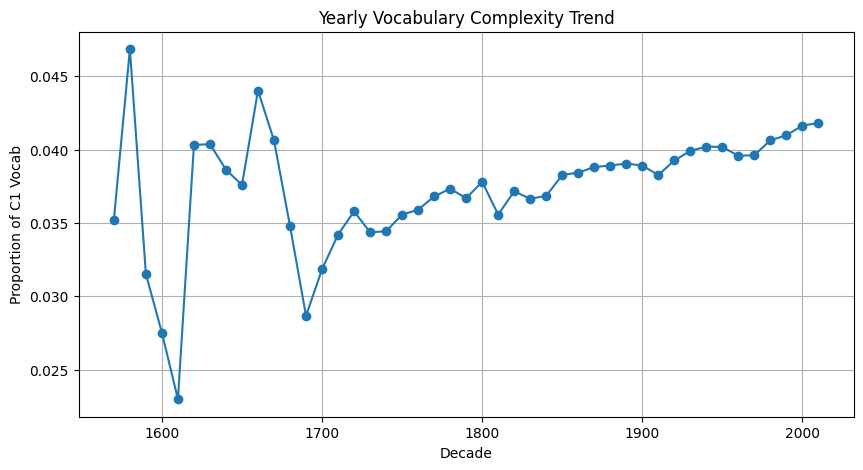

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(c1_proportion_decade['decade'], c1_proportion_decade['c1_proportion'], marker='o')
plt.xlabel("Decade")
plt.ylabel("Proportion of C1 Vocab")
plt.title("Yearly Vocabulary Complexity Trend")
plt.grid(True)
plt.show()

In [ ]:
%%bigquery b2_proportion_decade --project {project_id}
    SELECT *
FROM `de-hw1-447917.final_proj_dataset.b2_proportion_decade`;

Query is running:   0%|          |

Downloading:   0%|          |

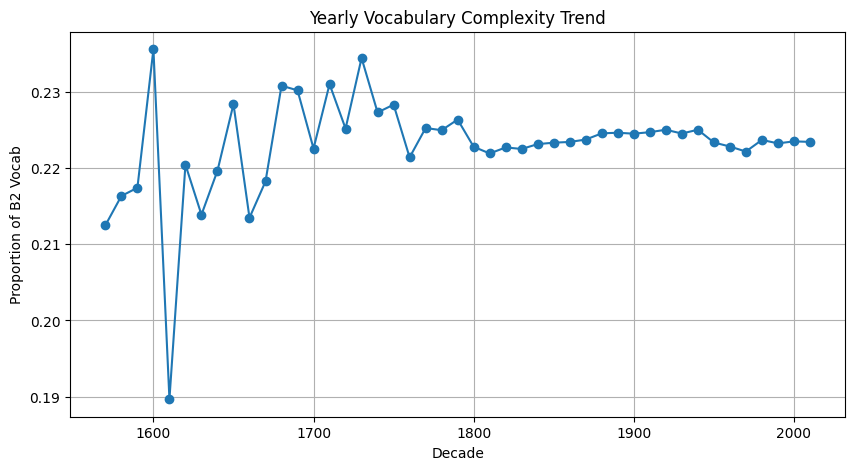

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(b2_proportion_decade['decade'], b2_proportion_decade['b2_proportion'], marker='o')
plt.xlabel("Decade")
plt.ylabel("Proportion of B2 Vocab")
plt.title("Yearly Vocabulary Complexity Trend")
plt.grid(True)
plt.show()

In [ ]:
%%bigquery b1_proportion_decade --project {project_id}
    SELECT *
FROM `de-hw1-447917.final_proj_dataset.b1_proportion_decade`;

Query is running:   0%|          |

Downloading:   0%|          |

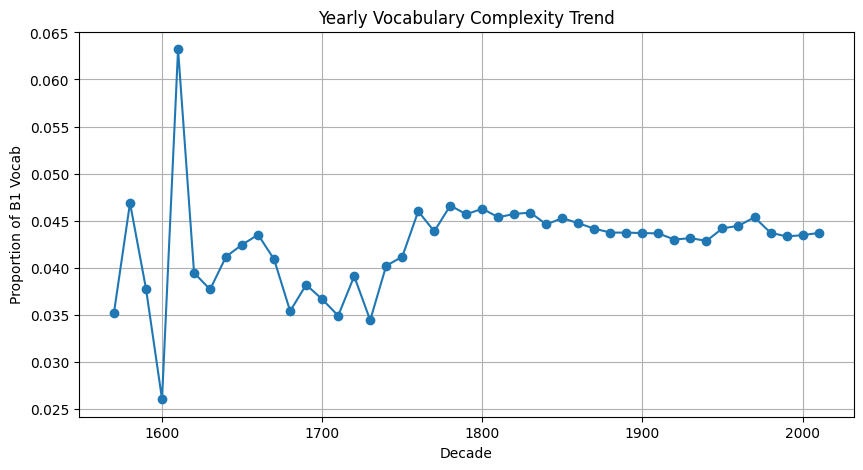

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(b1_proportion_decade['decade'], b1_proportion_decade['b1_proportion'], marker='o')
plt.xlabel("Decade")
plt.ylabel("Proportion of B1 Vocab")
plt.title("Yearly Vocabulary Complexity Trend")
plt.grid(True)
plt.show()

In [ ]:
%%bigquery a2_proportion_decade --project {project_id}
    SELECT *
FROM `de-hw1-447917.final_proj_dataset.a2_proportion_decade`;

Query is running:   0%|          |

Downloading:   0%|          |

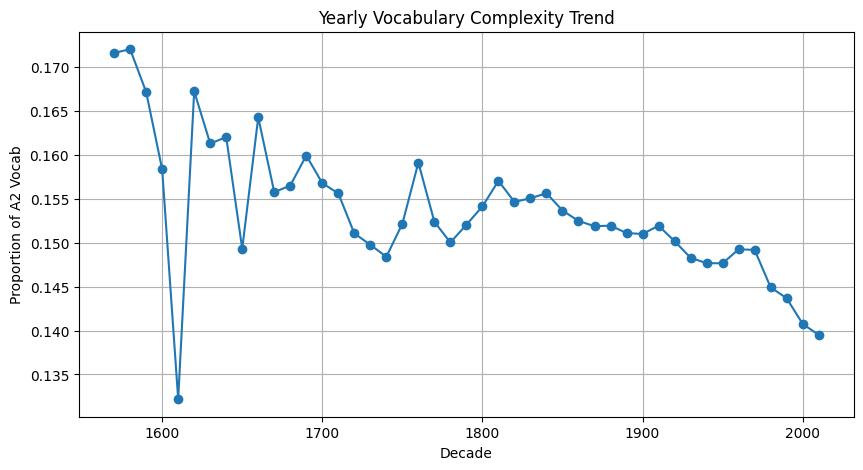

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(a2_proportion_decade['decade'], a2_proportion_decade['a2_proportion'], marker='o')
plt.xlabel("Decade")
plt.ylabel("Proportion of A2 Vocab")
plt.title("Yearly Vocabulary Complexity Trend")
plt.grid(True)
plt.show()

In [ ]:
%%bigquery a1_proportion_decade --project {project_id}
    SELECT *
FROM `de-hw1-447917.final_proj_dataset.a1_proportion_decade`;

Query is running:   0%|          |

Downloading:   0%|          |

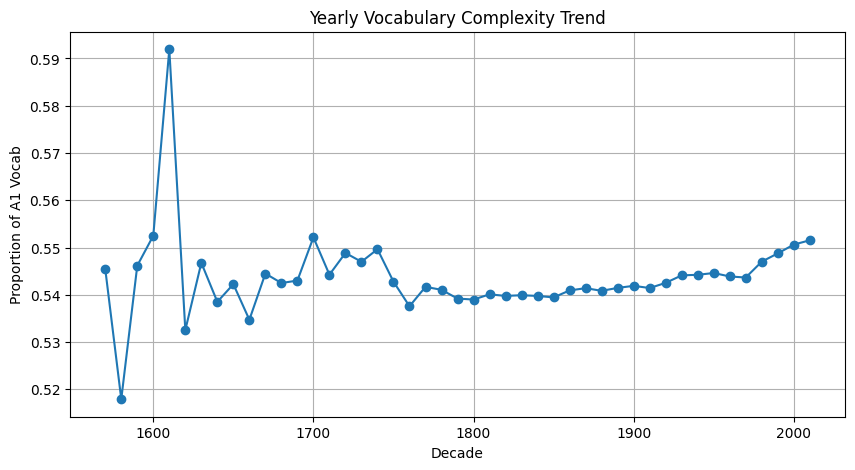

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(a1_proportion_decade['decade'], a1_proportion_decade['a1_proportion'], marker='o')
plt.xlabel("Decade")
plt.ylabel("Proportion of A1 Vocab")
plt.title("Yearly Vocabulary Complexity Trend")
plt.grid(True)
plt.show()

In [ ]:
%%bigquery proportions_all_decades --project {project_id}
    SELECT *
FROM `de-hw1-447917.final_proj_dataset.proportions_all_decades`;

Query is running:   0%|          |

Downloading:   0%|          |

<ipython-input-13-b93e01243c18>:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


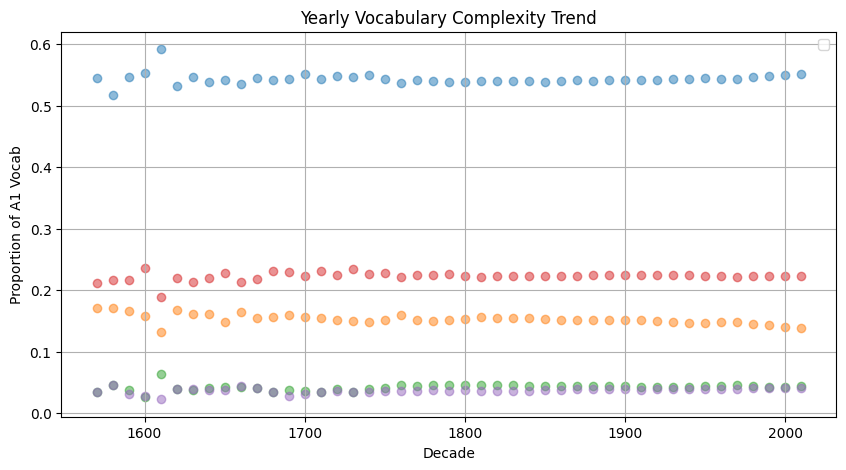

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(proportions_all_decades['decade'], proportions_all_decades['a1_proportion'], alpha=0.5)
plt.scatter(proportions_all_decades['decade'], proportions_all_decades['a2_proportion'], alpha=0.5)
plt.scatter(proportions_all_decades['decade'], proportions_all_decades['b1_proportion'], alpha=0.5)
plt.scatter(proportions_all_decades['decade'], proportions_all_decades['b2_proportion'], alpha=0.5)
plt.scatter(proportions_all_decades['decade'], proportions_all_decades['c1_proportion'], alpha=0.5)

plt.xlabel("Decade")
plt.ylabel("Proportion of Vocab")
plt.title("Proportion of Vocab by CEFR Level, by Decade, 1562-2019")
plt.grid(True)
plt.legend()
plt.show()

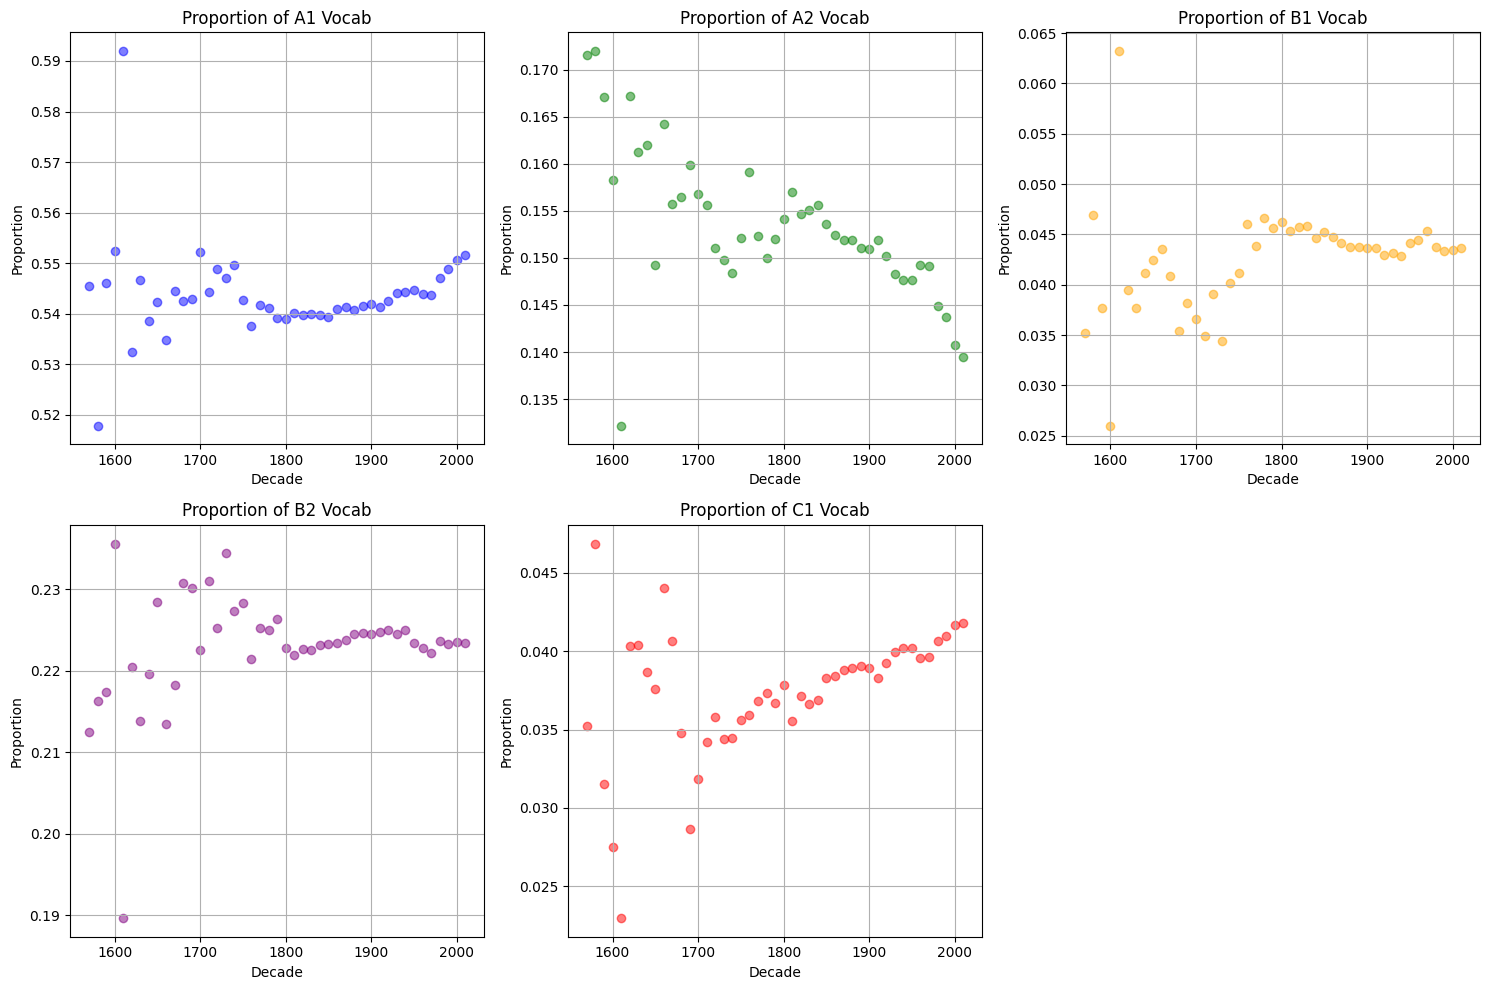

In [ ]:
import matplotlib.pyplot as plt

cefr_levels = ['a1', 'a2', 'b1', 'b2', 'c1']
colors = ['blue', 'green', 'orange', 'purple', 'red']
titles = ['A1', 'A2', 'B1', 'B2', 'C1']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes = axes.flatten()

for i, level in enumerate(cefr_levels):
    ax = axes[i]  # Select subplot
    ax.scatter(proportions_all_decades['decade'], proportions_all_decades[f'{level}_proportion'],
               alpha=0.5, color=colors[i])

    ax.set_title(f"Proportion of {titles[i]} Vocab")
    ax.set_xlabel("Decade")
    ax.set_ylabel("Proportion")
    ax.grid(True)

fig.delaxes(axes[-1])

plt.tight_layout()
plt.savefig("/content/drive/MyDrive/Data eng/vocab_proportions.png")
plt.show()


In [ ]:
post_2000 = proportions_all_decades[proportions_all_decades.decade >= 2000]
post_2000

,decade,a1_proportion,decade_1,a2_proportion,decade_2,b1_proportion,decade_3,b2_proportion,decade_4,c1_proportion
43,2000.0,0.550620,2000.0,0.140757,2000.0,0.043452,2000.0,0.223526,2000.0,0.041645
44,2010.0,0.551533,2010.0,0.139503,2010.0,0.043686,2010.0,0.223462,2010.0,0.041816


<ipython-input-17-f187b3f83eb8>:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


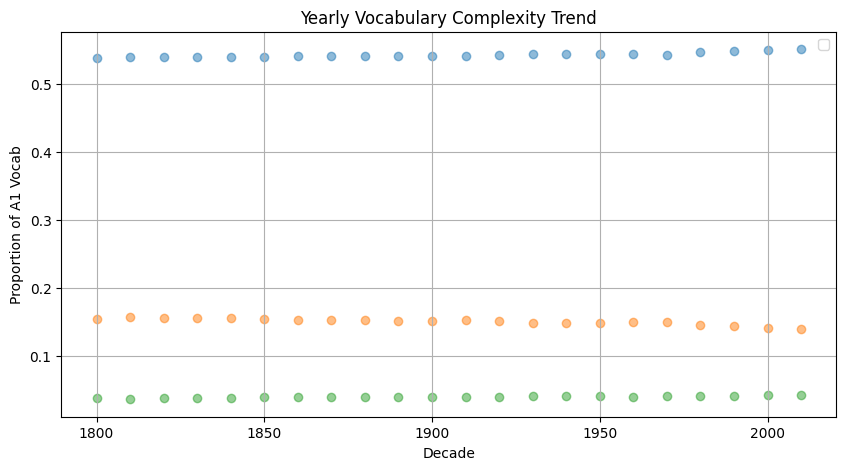

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(post_1800['decade'], post_1800['a1_proportion'], alpha=0.5)
plt.scatter(post_1800['decade'], post_1800['a2_proportion'], alpha=0.5)
plt.scatter(post_1800['decade'], post_1800['c1_proportion'], alpha=0.5)

plt.xlabel("Decade")
plt.ylabel("Proportion of A1 Vocab")
plt.title("Yearly Vocabulary Complexity Trend")
plt.grid(True)
plt.legend()
plt.show()